In [1]:
# Найти пользователей лояльных бренду

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv', encoding='windows-1251')

In [4]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [5]:
#отбираем нужные колонки

user_df = df[['tc', 'art_sp']]

In [6]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [7]:
user_df.head(30)

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
5,93265591,SPAGUETI PLATOS 500 G Brand_2
6,110002291,SPAGHETTINI 500 G Store_Brand
7,720501,SPAGHETTI 500 G Store_Brand
8,2415351,SPAGHETTI 500 G Brand_3
9,110016541,SPAGHETTI 500 G Store_Brand


In [8]:
brand_name_3 = ('MACARRONES 500 G Store_Brand')
def brand_split (brand_name_data):
    return brand_name_data.split(' ')[-1]
brand_split(brand_name_3)

'Store_Brand'

In [9]:
user_df['brand_name'] = user_df.brand_info.apply(brand_split)

In [10]:
# Другой способ взять last word из строки
user_df['brand_info'].str.split().str[-1]

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [11]:
user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [12]:
# Get brand name (last word) with lambda
# user_df.brand_info.apply(lambda x: x.split(' ')[-1])

In [13]:
#кол-во покупок каждого пользователя
user_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_info': 'count'}) \
    .rename(columns={'brand_info': 'purchases'}) \
    .query('purchases >= 5')

In [14]:
user_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [15]:
#найдем кол-во брендов купленных каждым юзером
user_uniqe_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

In [16]:
user_uniqe_brands.head(10)

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
5,19972,2
6,22291,2
7,24051,2
8,24341,1
9,24342,1


In [17]:
# прикидываем группу пользователей с каким кол-вом покупок взять в ислледование

user_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [18]:
user_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [19]:
user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [20]:
user_purchases

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [21]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .rename(columns={'brand_info': 'brand_purchases'}) \
    .sort_values(['user_id', 'brand_purchases'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand'})

In [22]:
lovely_brand_purchases_df.head()

,user_id,lovely_brand,brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [23]:
user_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [25]:
user_uniqe_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [32]:
#merge dataframes
loyality_df = user_purchases \
    .merge(user_uniqe_brands, on='user_id', how='inner') \
    .merge(lovely_brand_purchases_df, on='user_id', how='inner')

In [33]:
loyality_df.head()

,user_id,purchases,unique_brands,lovely_brand,brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [35]:
loyal_users = loyality_df[loyality_df.unique_brands == 1]

In [36]:
loyal_users.head()

,user_id,purchases,unique_brands,lovely_brand,brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12


In [40]:
# 
loyality_df['loyality_score'] = (loyality_df.brand_purchases / loyality_df.purchases).round(2)

In [43]:
loyality_df.sort_values('loyality_score', ascending=False)

,user_id,purchases,unique_brands,lovely_brand,brand_purchases,loyality_score
2143,54915411,10,1,Brand_4,10,1.00
1662,27647721,6,1,Brand_4,6,1.00
1655,27415431,8,1,Brand_4,8,1.00
2880,94697021,9,1,Brand_4,9,1.00
1657,27472311,7,1,Brand_4,7,1.00
...,...,...,...,...,...,...
424,2225591,7,4,Brand_1,2,0.29
577,3616201,7,4,Brand_1,2,0.29
453,2406921,7,5,Brand_2,2,0.29
2479,78381941,7,4,Brand_3,2,0.29


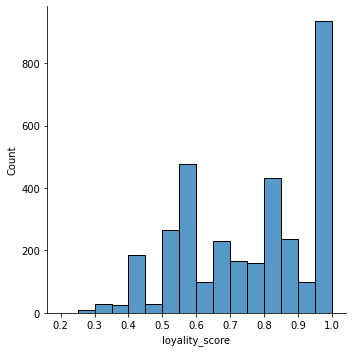

In [46]:
ax = sns.displot(loyality_df.loyality_score)

In [53]:
brand_loyality = loyality_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyality_score': 'median', 'user_id': 'count'})

In [58]:
brand_loyality.head()

,lovely_brand,loyality_score,user_id
0,Brand_1,0.68,410
1,Brand_2,0.60,88
2,Brand_3,0.50,115
3,Brand_4,0.82,2041
4,Brand_5,0.60,5


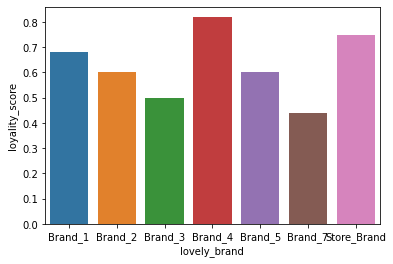

In [59]:
ax = sns.barplot(x="lovely_brand", y="loyality_score", data=brand_loyality)